In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.sparse import csr_matrix
import random
from IPython.display import SVG, display
from sknetwork.hierarchy import Paris, cut_straight, LouvainHierarchy, cut_balanced
from sknetwork.clustering import Louvain
from sknetwork.visualization import svg_graph, svg_bigraph, svg_dendrogram
import pandas as pd
from netgraph import Graph
# from community_layout.layout_class import CommunityLayout
import matplotlib
from mycolorpy import colorlist as mcp
matplotlib.rcParams['figure.dpi'] = 200
random.seed(42)
np.random.seed(42)

In [2]:
# Finanses
df_fin = pd.read_csv('../data preprocessing and plotting/FINANSES_dataset.csv')
df_fin = df_fin.groupby(["Country","Partner"], sort=False, as_index=False).agg({"Value":"sum"})
g1 = nx.Graph()
for i, row in df_fin.iterrows():
    if row['Value'] != 0 and row['Country'] != row['Partner']:
        g1.add_edge(row['Country'], row['Partner'], weight=row['Value'])

In [3]:
# Organizations
df_org = pd.read_csv("../data preprocessing and plotting/ORGANIZATIONS_dataset.csv")
g2 = nx.Graph()
for i, row in df_org.iterrows():
    if not g2.has_edge(row['country1'], row['country2']):
        g2.add_edge(row['country1'], row['country2'], weight=row['value'])

In [134]:
#Organizations filtered out, leaving only edges with 50 or more 
df_org_50 =  df_org[df_org['value'] > 50]
g_org_50 = nx.from_pandas_edgelist(df_org_50,'country1','country2',['value'])

In [5]:
df_org['value'].unique()

array([ 28,  25,  20,  26,  32,  31,  24,  23,  43,  22,  27,  29,  33,
        35,  36,  21,  39,  38,  30,  17,   9,  37,  19,  41,  14,  15,
        16,  18,  48,  40,  51,  45,  52,  34,  50,  46,  49,  44,  47,
        42,  13,  54,  53,  56,  59,  58,  64,  57,  61,  88,  60,  55,
        74,  12,  80,  63,  71,  62,  76,  92,  10,  65,  84,  75,  72,
        68,  73,  66,  69,  67,  70,  89,  85,  90,  78,  91,  77,  86,
        11,  95,  98, 112, 104, 100,  97, 109, 105,  99,  94,  83,  87,
        93,  81,  82, 108,  79, 110,  96, 102, 101, 103, 114, 113, 111,
       115, 106,   4,   8,   6,   5,   7, 107])

c:\Users\Wojtek\AppData\Local\Programs\Python\Python39\lib\site-packages\netgraph\_utils.py:360: RuntimeWarning: invalid value encountered in divide
  v = v / np.linalg.norm(v, axis=-1)[:, None] # unit vector


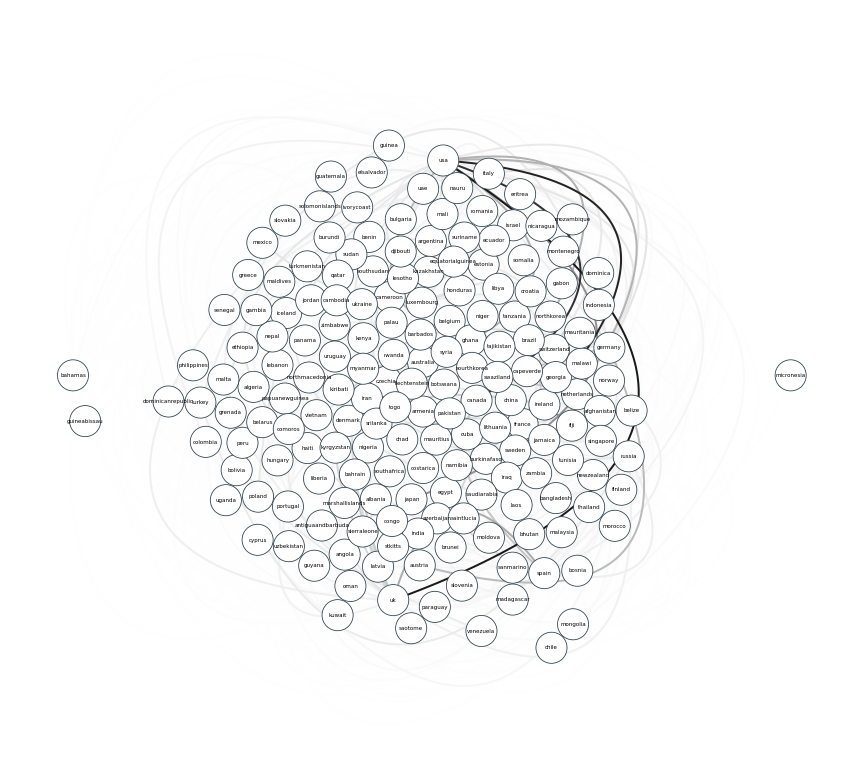

In [4]:
random.seed(42)
g1_pos = {node: (random.randint(0,10000)/10000,random.randint(0,10000)/10000) for node in g1.nodes()}
Graph(g1, node_layout='spring',
node_layout_kwargs={"node_positions": g1_pos},
node_labels=True,
edge_width=0.25,
node_size=2,
node_label_fontdict={'size': 2},
node_edge_width=0.1,
edge_layout='arc',
edge_alpha=1
)
plt.show()

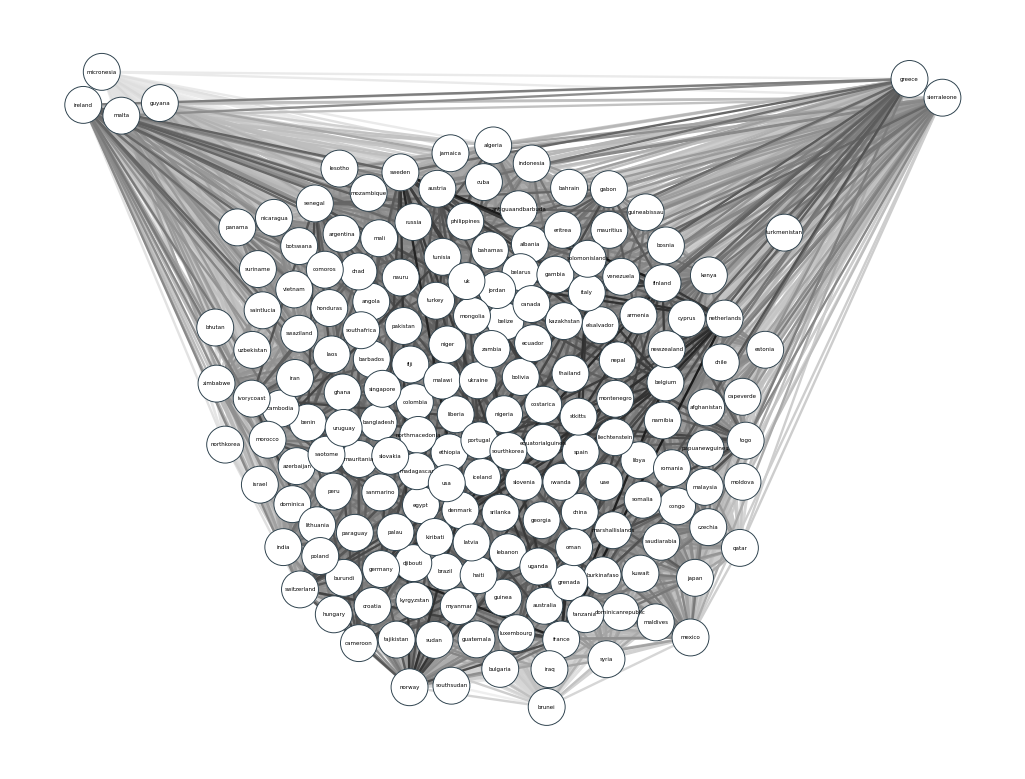

In [5]:
random.seed(42)
g2_pos = {node: (random.randint(0,10000)/10000,random.randint(0,10000)/10000) for node in g2.nodes()}
Graph(g2, node_layout='spring',
node_layout_kwargs={"node_positions": g2_pos},
node_labels=True,
edge_width=0.25,
node_size=2,
node_label_fontdict={'size': 2},
node_edge_width=0.1,
edge_layout='straight',
edge_alpha=1
)
plt.show()

In [6]:
def clustering(graph, n_clusters, chosen_alg, res):
    if chosen_alg == 'paris':
        alg = Paris()
    elif chosen_alg == 'louvain':
        alg = LouvainHierarchy(resolution=res)
    dendrogram = alg.fit_predict(nx.adjacency_matrix(graph).toarray())
    if chosen_alg == 'louvain':
        image = svg_dendrogram(dendrogram, names=list(graph.nodes), width=600)
    elif chosen_alg == 'paris':
        image = svg_dendrogram(dendrogram, names=list(graph.nodes), width=600, n_clusters=n_clusters)
    display(SVG(image))
    return cut_straight(dendrogram, n_clusters=n_clusters)

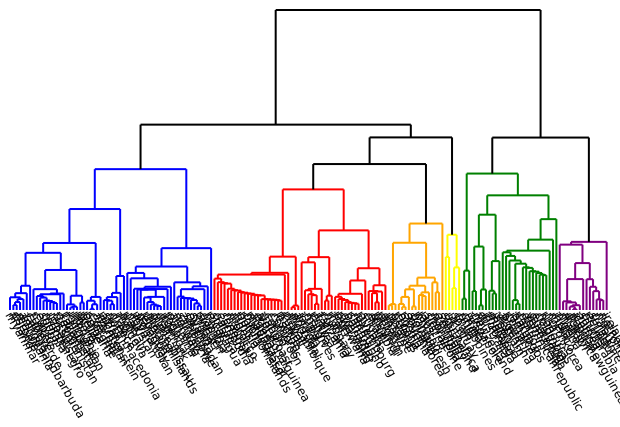

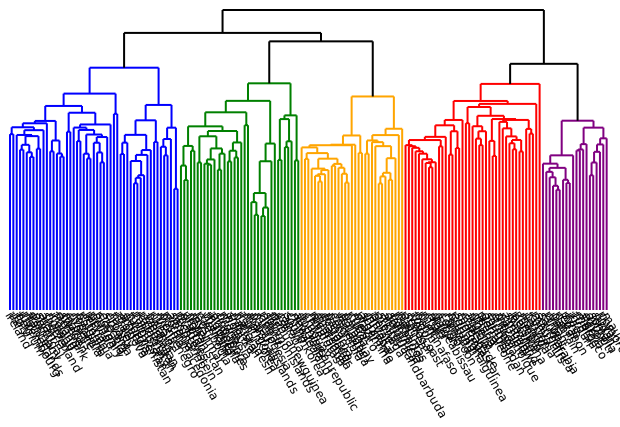

In [12]:
n_clusters_g1 = 6
n_clusters_g2 = 5
labels1 = clustering(g1, n_clusters_g1, 'paris', 1.3)
labels2 = clustering(g2, n_clusters_g2, 'paris', 1.1)
n_clusters_g1 = len(np.unique(labels1))
n_clusters_g2 = len(np.unique(labels2))

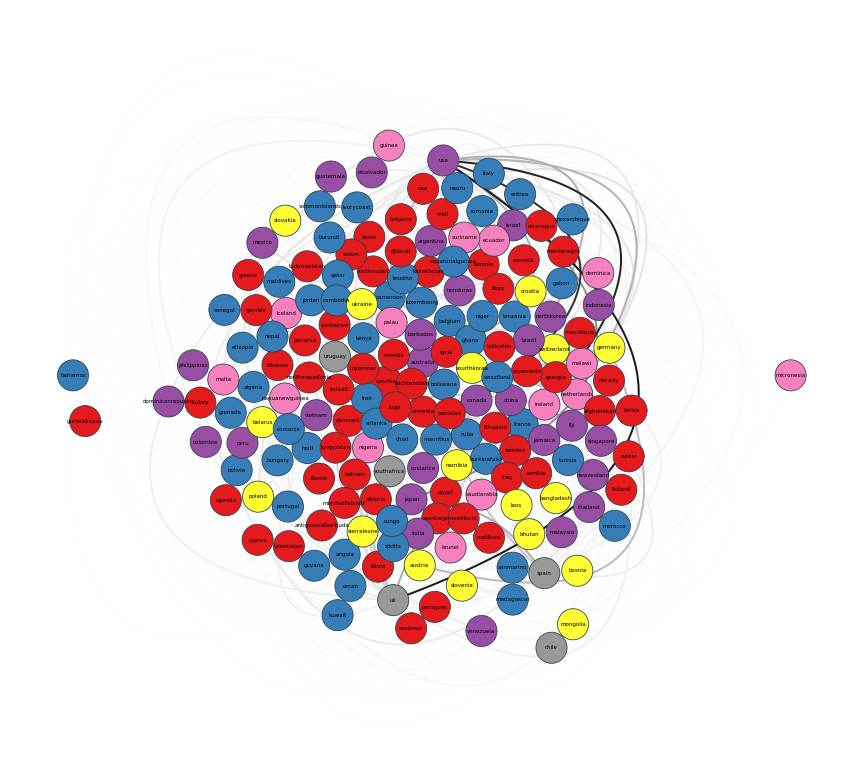

In [13]:
cmap1 = mcp.gen_color(cmap="Set1",n=n_clusters_g1)
Graph(g1, node_layout='spring',
node_labels=True,
node_layout_kwargs={'node_positions': g1_pos},
node_color={node: cmap1[clas] for node, clas in zip(g1.nodes(), labels1)},
edge_width=0.25,
node_size=2,
node_label_fontdict={'size': 2},
node_edge_width=0.1,
edge_layout='arc',
edge_alpha=1)
plt.show()

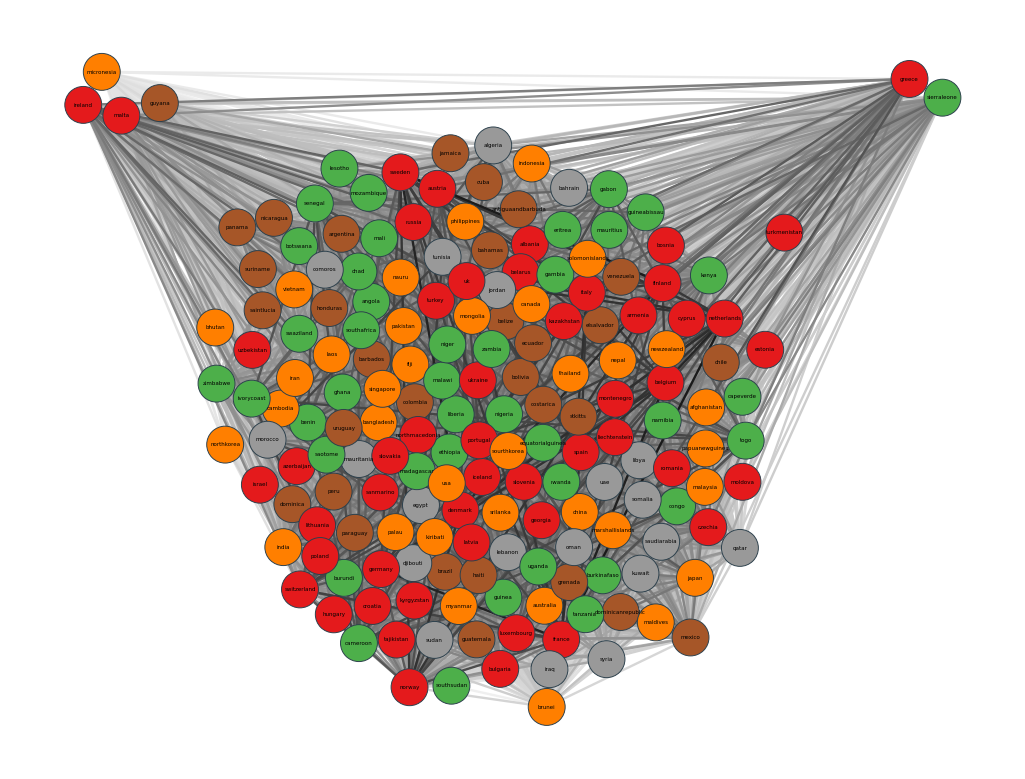

In [14]:
cmap2 = mcp.gen_color(cmap="Set1",n=n_clusters_g2)
Graph(g2, node_layout='spring',
node_labels=True,
node_layout_kwargs={'node_positions': g2_pos},
node_color={node: cmap2[clas] for node, clas in zip(g2.nodes(), labels2)},
edge_width=0.25,
node_size=2,
node_label_fontdict={'size': 2},
node_edge_width=0.1,
edge_layout='straight',
edge_alpha=1)
plt.show()

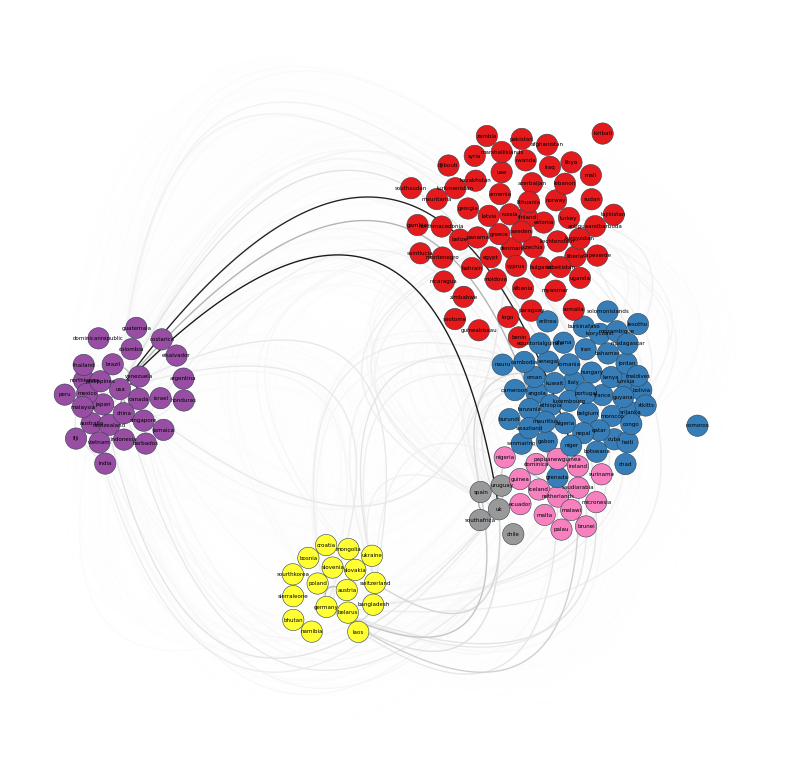

In [15]:
Graph(g1,
      node_labels=True,
      node_color={node: cmap1[clas] for node, clas in zip(g1.nodes(), labels1)},
      node_layout='community', node_layout_kwargs={'node_to_community': {node: label for node, label in zip(g1.nodes(), labels1)}},
      edge_layout='arc', edge_layout_kwargs=dict(k=2000),
      edge_width=0.25,
      node_size=2,
      node_label_fontdict={'size': 2},
      node_edge_width=0.1,
      edge_alpha=1
)

c:\Users\Wojtek\AppData\Local\Programs\Python\Python39\lib\site-packages\netgraph\_node_layout.py:1024: RuntimeWarning: invalid value encountered in divide
  directions = deltas / magnitudes[:, np.newaxis]


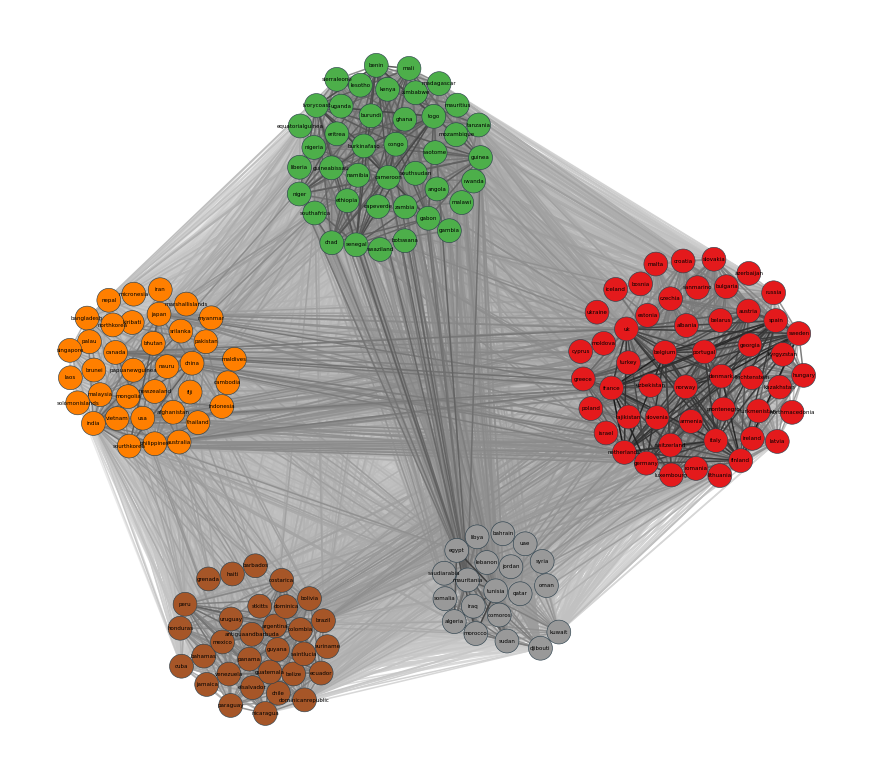

In [16]:
Graph(g2,
      node_labels=True,
      node_color={node: cmap2[clas] for node, clas in zip(g2.nodes(), labels2)},
      node_layout='community', node_layout_kwargs={'node_to_community': {node: label for node, label in zip(g2.nodes(), labels2)}},
      edge_layout='straight', edge_layout_kwargs=dict(k=2000),
      edge_width=0.25,
      node_size=2,
      node_label_fontdict={'size': 2},
      node_edge_width=0.1,
      edge_alpha=1
)

In [39]:
def jaccard_similarity(set1, set2):
    c = set1.intersection(set2)
    d = set1.union(set2)
    return len(c) / len(d)

In [40]:
def cluster_similarity_report(g1, g2, g1_n_clusters, g2_n_clusters, g1_labels, g2_labels):
    g1_clusters = [set() for _ in range(g1_n_clusters)]
    g2_clusters = [set() for _ in range(g2_n_clusters)]
    for node, clas in zip(g1.nodes, g1_labels):
        g1_clusters[clas].add(node)
    for node, clas in zip(g2.nodes, g2_labels):
        g2_clusters[clas].add(node)
    similarities = np.zeros((g1_n_clusters, g2_n_clusters))
    for i, g1_cluster in enumerate(g1_clusters):
        for j, g2_cluster in enumerate(g2_clusters):
            sim = jaccard_similarity(g1_cluster, g2_cluster)
            similarities[i, j] = sim
    return similarities, g1_clusters, g2_clusters


Text(101.44444444444443, 0.5, 'g1')

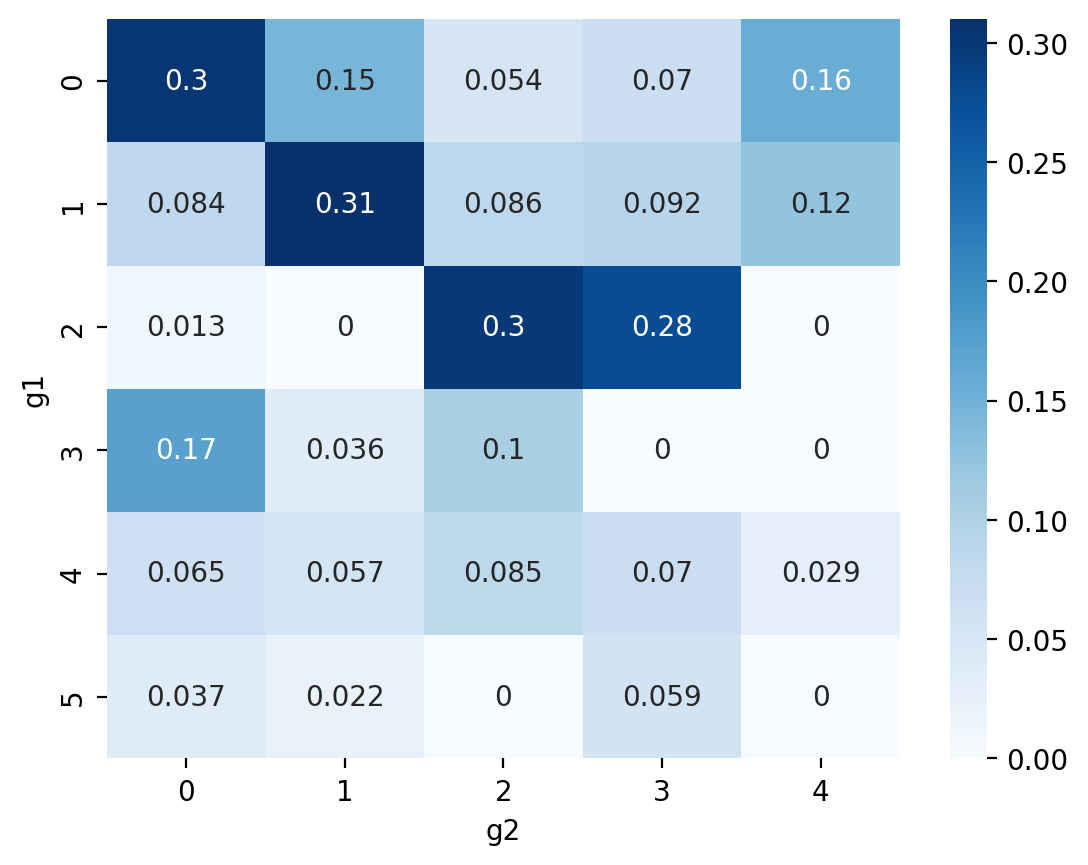

In [54]:
report, g1_clusters, g2_clusters = cluster_similarity_report(g1, g2, n_clusters_g1, n_clusters_g2, labels1, labels2)
ax = sns.heatmap(report, annot=True, cmap='Blues')
ax.set_xlabel('g2')
ax.set_ylabel('g1')

In [53]:
g1_n = 1
g2_n = 4
g1_members = sorted(g1_clusters[g1_n])
g2_members = sorted(g2_clusters[g2_n])
all_unique_members = set(g1_members+g2_members)
df = pd.DataFrame(columns=[f'g1', f'g2'], index=list(all_unique_members))
for member in all_unique_members:
    df.loc[member, 'g1'] = 'x' if member in g1_members else ''
    df.loc[member, 'g2'] = 'x' if member in g2_members else ''
pd.options.display.max_rows = 999
df[(df['g1']=='x') & (df['g2']=='x')].to_clipboard()
df

g1 g2
cameroon          x   
lesotho           x   
belgium           x   
lebanon              x
grenada           x   
somalia              x
guyana            x   
jordan            x  x
burundi           x   
mozambique        x   
qatar             x  x
stkitts           x   
mauritania           x
algeria           x  x
luxembourg        x   
ethiopia          x   
ghana             x   
bolivia           x   
madagascar        x   
equatorialguinea  x   
nepal             x   
kenya             x   
niger             x   
iraq                 x
saudiarabia          x
botswana          x   
kuwait            x  x
burkinafaso       x   
maldives          x   
congo             x   
comoros           x  x
srilanka          x   
sudan                x
senegal           x   
bahamas           x   
cuba              x   
portugal          x   
bahrain              x
nauru             x   
oman              x  x
italy             x   
mauritius         x   
iran              x   
romania           x   
hungary           x   
morocco           x  x
angola            x   
cambodia          x   
chad              x   
solomonislands    x   
tunisia           x  x
eritrea           x   
egypt                x
syria                x
france            x   
djibouti             x
libya                x
haiti             x   
uae                  x
ivorycoast        x   
tanzania          x   
gabon             x   
swaziland         x   
sanmarino         x

In [74]:
# Avg org between cntrs in each flow cluster
mtx = np.ones((n_clusters_g1, n_clusters_g1))*-1
for i, cluster1 in enumerate(g1_clusters):
    for j, cluster2 in enumerate(g1_clusters):
        done = nx.Graph()
        summ = 0
        cnt = 0
        for country1 in cluster1:
            for country2 in cluster2:
                if country1 != country2 and done.get_edge_data(country1, country2) is None:
                    done.add_edge(country1, country2, weight=1)
                    if g2.get_edge_data(country1, country2):
                        summ += g2.get_edge_data(country1, country2)['weight']
                        cnt += 1
                    else:
                        cnt += 1
        if cnt != 0:
            mtx[i, j] = summ/cnt
mtx = np.round(mtx)
ax = sns.heatmap(mtx, annot=True, cmap='Blues', fmt='g')
ax.set_xlabel('g2')
ax.set_ylabel('g2')

Text(101.44444444444443, 0.5, 'g2')

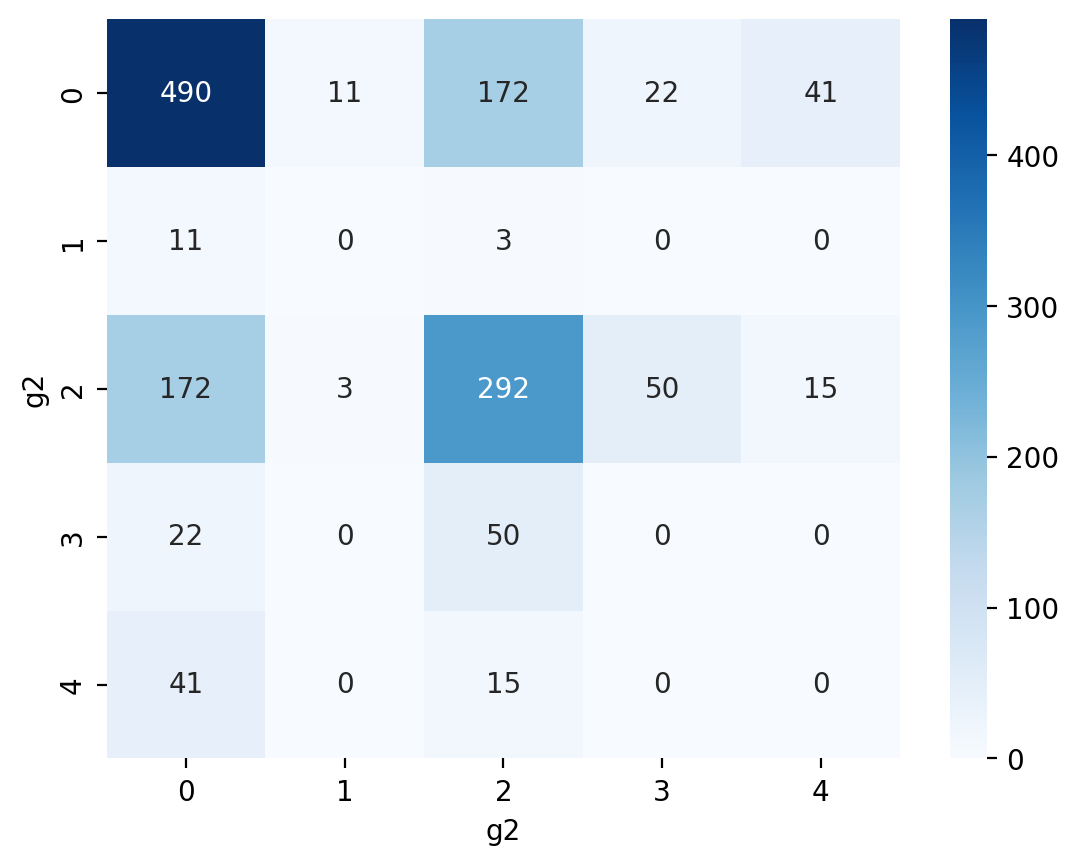

In [63]:
# Avg flow between cntrs in each org cluster
mtx = np.ones((n_clusters_g2, n_clusters_g2))
for i, cluster1 in enumerate(g2_clusters):
    for j, cluster2 in enumerate(g2_clusters):
        done = nx.Graph()
        summ = 0
        cnt = 0
        for country1 in cluster1:
            for country2 in cluster2:
                if country1 != country2 and done.get_edge_data(country1, country2) is None:
                    done.add_edge(country1, country2, weight=1)
                    if g1.get_edge_data(country1, country2):
                        summ += g1.get_edge_data(country1, country2)['weight']
                        cnt += 1
                    else:
                        cnt += 1
        if cnt != 0:
            mtx[i, j] = summ/cnt
mtx = np.round(mtx)
ax = sns.heatmap(mtx, annot=True, cmap='Blues', fmt='g')
ax.set_xlabel('g2')
ax.set_ylabel('g2')

K-cores

- max k-core to 31 (w finansach) - można to pokolorować

- w organizacjach się nie da bo jest każdy z każdym (178)

In [20]:
g1.degree

DegreeView({'austria': 138, 'australia': 46, 'belgium': 160, 'canada': 64, 'chile': 23, 'czechia': 142, 'denmark': 176, 'estonia': 117, 'finland': 132, 'france': 146, 'germany': 168, 'greece': 152, 'hungary': 132, 'iceland': 101, 'ireland': 80, 'israel': 28, 'italy': 173, 'japan': 44, 'northkorea': 31, 'luxembourg': 160, 'mexico': 30, 'netherlands': 176, 'newzealand': 55, 'norway': 28, 'poland': 143, 'portugal': 132, 'slovakia': 100, 'slovenia': 117, 'spain': 56, 'sweden': 170, 'switzerland': 31, 'turkey': 28, 'uk': 61, 'usa': 69, 'algeria': 21, 'morocco': 25, 'tunisia': 20, 'angola': 17, 'benin': 11, 'botswana': 14, 'burkinafaso': 12, 'cameroon': 16, 'ivorycoast': 18, 'egypt': 26, 'ethiopia': 19, 'gabon': 15, 'ghana': 18, 'kenya': 20, 'liberia': 19, 'libya': 18, 'mauritius': 19, 'mozambique': 19, 'nigeria': 25, 'senegal': 17, 'sierraleone': 14, 'southafrica': 31, 'southsudan': 9, 'sudan': 15, 'tanzania': 20, 'zimbabwe': 12, 'bahamas': 21, 'barbados': 20, 'belize': 21, 'costarica': 23,

In [21]:
core_dict = nx.core_number(g1)

set(core_dict.values())

{1,
 2,
 4,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31}

/home/mateusz/.local/lib/python3.10/site-packages/netgraph/_utils.py:360: RuntimeWarning: invalid value encountered in divide
  v = v / np.linalg.norm(v, axis=-1)[:, None] # unit vector


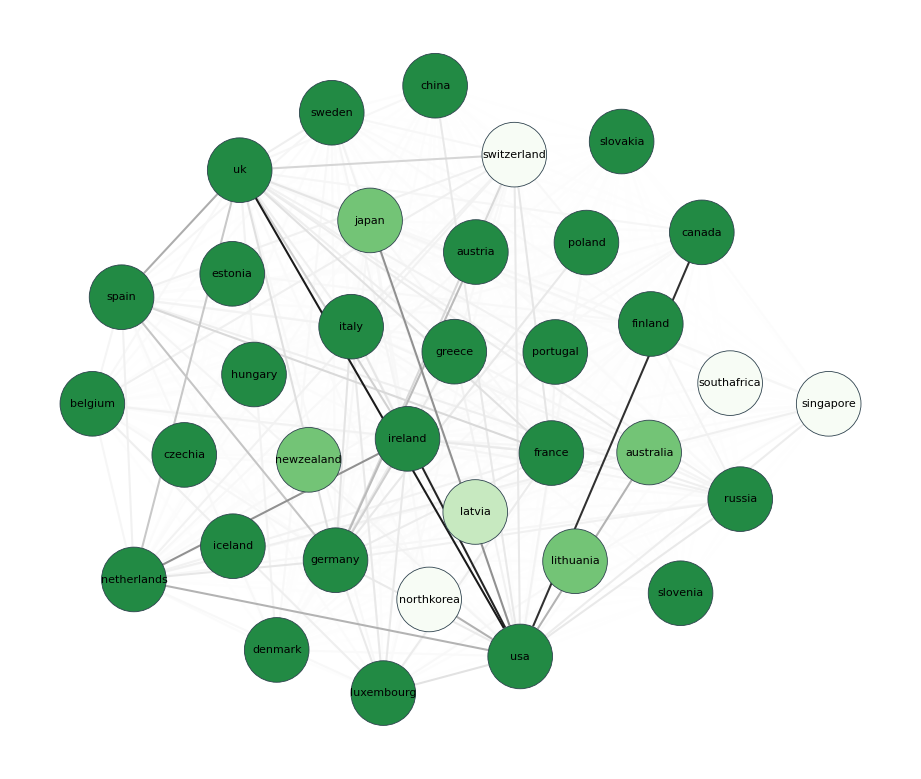

In [148]:
core_fin = nx.k_core(g1,k=31)
cmap3 = mcp.gen_color(cmap='Greens',n=5)
MIN_DEGREE = 31
Graph(core_fin,
      node_labels=True,
      node_color={node: cmap3[degree - MIN_DEGREE] for node, degree in  dict(core_fin.degree).items()},
      # node_layout='community', node_layout_kwargs={'node_to_community': {node: label for node, label in zip(g2.nodes(), labels2)}},
      # edge_layout='straight', edge_layout_kwargs=dict(k=2000),
      edge_width=0.25,
      node_size=4,
      node_label_fontdict={'size': 4},
      node_edge_width=0.1,
      edge_alpha=1
)

In [ ]:
core_g = nx.k_core(g1,k=31)

In [93]:
# degree of North Korea in main graph
g1.degree['northkorea']


31

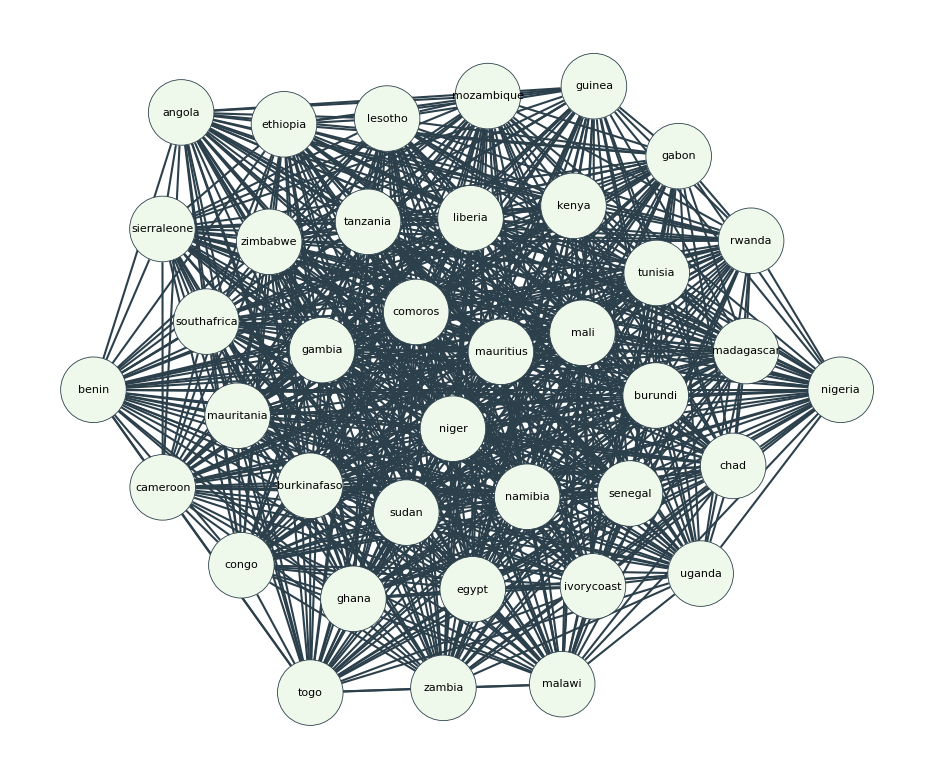

In [152]:
set(dict(nx.core_number(g_org_50)).values())
core_org_50 = nx.k_core(g_org_50,k=37)
cmap3 = mcp.gen_color(cmap='Greens',n=100)
MIN_DEGREE = 31
Graph(core_org_50,
      node_labels=True,
      node_color={node: cmap3[degree - MIN_DEGREE] for node, degree in  dict(core_org_50.degree).items()},
      # node_layout='community', node_layout_kwargs={'node_to_community': {node: label for node, label in zip(g2.nodes(), labels2)}},
      # edge_layout='straight', edge_layout_kwargs=dict(k=2000),
      edge_width=0.25,
      node_size=4,
      node_label_fontdict={'size': 4},
      node_edge_width=0.1,
      edge_alpha=1
)

In [178]:
#leaders in the k_core
max_core_org_50_and_degree = {}
for country, degree in dict(core_org_50.degree).items():
    max_core_org_50_and_degree[country] = g_org_50.degree[country]
import heapq
from operator import itemgetter

N = 3

topitems = heapq.nlargest(N, max_core_org_50_and_degree.items(), key=itemgetter(1))
dict(topitems) # most develped afican countries 

{'tunisia': 82, 'egypt': 80, 'southafrica': 79}

In [ ]:
unique_values = nx.core_number(g2)
set(unique_values.values())

{178}

In [175]:
# analysis of cash flow when it comes to african countries

country_total_value = {}

for country, degree in dict(core_org_50.degree).items():
    country_total_value[country] = df_fin.loc[(df_fin['Country'] == country)]['Value'].sum() + df_fin.loc[(df_fin['Partner'] == country)]['Value'].sum()

N = 5
topitems = heapq.nlargest(N, country_total_value.items(), key=itemgetter(1))
dict(topitems) 

{'egypt': 6995.8,
 'southafrica': 6202.200000000001,
 'angola': 4677.4,
 'nigeria': 4665.2,
 'tunisia': 3681.1}

In [ ]:
nx.triangles(g1)

{'austria': 2543,
 'australia': 823,
 'belgium': 2820,
 'canada': 1233,
 'chile': 253,
 'czechia': 2591,
 'denmark': 2940,
 'estonia': 2211,
 'finland': 2432,
 'france': 2608,
 'germany': 2866,
 'greece': 2716,
 'hungary': 2438,
 'iceland': 1954,
 'ireland': 1554,
 'israel': 378,
 'italy': 2922,
 'japan': 811,
 'northkorea': 462,
 'luxembourg': 2790,
 'mexico': 432,
 'netherlands': 2933,
 'newzealand': 1029,
 'norway': 377,
 'poland': 2564,
 'portugal': 2397,
 'slovakia': 1976,
 'slovenia': 2206,
 'spain': 1116,
 'sweden': 2902,
 'switzerland': 462,
 'turkey': 378,
 'uk': 1224,
 'usa': 1369,
 'algeria': 210,
 'morocco': 300,
 'tunisia': 190,
 'angola': 136,
 'benin': 55,
 'botswana': 91,
 'burkinafaso': 66,
 'cameroon': 120,
 'ivorycoast': 153,
 'egypt': 324,
 'ethiopia': 171,
 'gabon': 105,
 'ghana': 153,
 'kenya': 190,
 'liberia': 171,
 'libya': 153,
 'mauritius': 171,
 'mozambique': 171,
 'nigeria': 300,
 'senegal': 136,
 'sierraleone': 91,
 'southafrica': 462,
 'southsudan': 36,
 '

In [ ]:
nx.triangles(g2)

{'afghanistan': 15753,
 'albania': 15753,
 'algeria': 15753,
 'angola': 15753,
 'antiguaandbarbuda': 15753,
 'argentina': 15753,
 'armenia': 15753,
 'australia': 15753,
 'austria': 15753,
 'azerbaijan': 15753,
 'bahamas': 15753,
 'bahrain': 15753,
 'bangladesh': 15753,
 'barbados': 15753,
 'belarus': 15753,
 'belgium': 15753,
 'belize': 15753,
 'benin': 15753,
 'bhutan': 15753,
 'bolivia': 15753,
 'bosnia': 15753,
 'botswana': 15753,
 'brazil': 15753,
 'brunei': 15753,
 'bulgaria': 15753,
 'burkinafaso': 15753,
 'burundi': 15753,
 'cambodia': 15753,
 'cameroon': 15753,
 'canada': 15753,
 'capeverde': 15753,
 'chad': 15753,
 'chile': 15753,
 'china': 15753,
 'colombia': 15753,
 'comoros': 15753,
 'congo': 15753,
 'costarica': 15753,
 'croatia': 15753,
 'cuba': 15753,
 'cyprus': 15753,
 'czechia': 15753,
 'denmark': 15753,
 'djibouti': 15753,
 'dominicanrepublic': 15753,
 'dominica': 15753,
 'ecuador': 15753,
 'egypt': 15753,
 'elsalvador': 15753,
 'equatorialguinea': 15753,
 'eritrea': 

In [ ]:
nx.transitivity(g1)

0.3470742237736542

In [ ]:
nx.transitivity(g2)

1.0

In [154]:
nx.transitivity(g_org_50)

0.6928970323533484

In [ ]:
nx.average_clustering(g1)

0.8897004769706746

In [ ]:
nx.average_clustering(g2)

1.0

In [156]:
nx.average_clustering(g_org_50)

0.7731325180342082

In [ ]:
nx.density(g1)

0.1959073504488105

In [ ]:
nx.density(g2)

1.0

In [157]:
nx.density(g_org_50)

0.2483912483912484

In [185]:
G=g1
bb = dict(g1.degree)
isinstance(bb, dict)
nx.set_node_attributes(G, bb, "degree")

138

In [186]:
nx.numeric_assortativity_coefficient(G, "degree")

-0.727424067739889

In [187]:
nx.attribute_assortativity_coefficient(G, "degree")

-0.02621212735359513

In [188]:
nx.degree_assortativity_coefficient(G)

-0.727424067739889

In [181]:
G=g2
bb = dict(g2.degree)
isinstance(bb, dict)
nx.set_node_attributes(G, bb, "degree")
G.nodes['austria']["degree"]

178

In [182]:
nx.numeric_assortativity_coefficient(G, "degree")

/home/mateusz/.local/lib/python3.10/site-packages/networkx/algorithms/assortativity/correlation.py:298: RuntimeWarning: invalid value encountered in scalar divide
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)


nan

In [183]:
nx.attribute_assortativity_coefficient(G, "degree")

/home/mateusz/.local/lib/python3.10/site-packages/networkx/algorithms/assortativity/correlation.py:278: RuntimeWarning: invalid value encountered in scalar divide
  r = (t - s) / (1 - s)


nan

In [184]:
nx.degree_assortativity_coefficient(G)

nan

In [193]:
G=g_org_50
bb = dict(g_org_50.degree)
isinstance(bb, dict)
nx.set_node_attributes(G, bb, "degree")

In [194]:
nx.numeric_assortativity_coefficient(G, "degree")

0.22049088347048562

In [195]:
nx.attribute_assortativity_coefficient(G, "degree")

0.0030072835608145362

In [196]:
nx.degree_assortativity_coefficient(G)

0.22049088347048562